# 决策树

### 1. 信息论的函数为什么定义为$H(p)=-\sum_{i=1}^np_i\log p_i$的形式？定义成这样的形式有什么好处？

Shannon于1948年，在创造信息论的著名论文《A Mathematical Theory of Communication》中指出如下定理：

<div class="alert alert-info"><h4>定理1</h4><p>
如果度量不确定性的函数$H(p)$满足以下三个条件：
    
* $H$关于$p_i$是连续函数<br/><br/>
* 若$p_1=p_2=\cdots=p_n$，则$H(p)$关于$n$单调递增<br/><br/>
* 若将一个 $p_i$拆分成 $p_{i,1}$和 $p_{i,2}$，则
    
    $$H(p_1,\cdots,p_{i-1},p_{i,1},p_{i,2},p_{i+1},\cdots,p_n)=H(p_1,\cdots,p_{i-1},p_{i},p_{i+1},\cdots,p_n)+
    p_iH(\frac{p_{i,1}}{p_i},\frac{p_{i,2}}{p_i})$$
    
那么$H$的形式只能是
    
$$H(p_1,p_2,\cdots,p_n)= -C\sum_{i=1}^np_i\log p_i$$
    
</p></div>

其中，第二个条件直观地体现了$H(p)$会随着概率的分散而增加。

条件三说明将某个事件拆分为多个事件时的不确定性增加了，并且增加的不确定性与拆分时的比例和拆分事件的概率有关。拆分高概率事件比拆分低概率事件增加的混乱程度更大。拆分概率拆得越均匀，不确定性越大。

支撑集为$K$个不同实数的离散分布，**熵在单点分布时最小，此时熵为0；在均匀分布时最大，此时熵为$\log K$**。

### 2. 为什么要研究条件熵？条件熵应该怎么计算？它有哪些性质？

在决策树的分裂过程中，我们不但需要考察某个节点的不确定性或纯度，而且还要考察它的子节点的平均不确定性或平均纯度来决定是否进行分裂。子节点的产生来源于决策树分支的条件，因此我们不但要研究随机变量的信息熵，还要研究在给定条件下随机变量的平均信息熵或条件熵。

条件熵的计算公式为

$$H(Y|X)=E_X[E_{Y|X}[-\log_2P(Y|X)]]$$

<div class="alert alert-block alert-info"><h4>定理2</h4><p>
    设$Y$和$X$是离散随机变量，$Y$关于$X$的信息增益非负。
</p></div>
    
根据条件熵可以定义信息增益

$$G(Y,X)=H(Y)-H(Y|X)$$

本质上，信息增益可以理解为$p(y,x)$关于$p(y)p(x)$的KL散度，

$$G(Y,X)=-\sum_{k=1}^K\sum_{m=1}^Mp(y_k,x_m)\log_2\frac{p(y_k)p(x_m)}{p(y_k,x_m)}$$

因此我们立即可以看出，**信息增益是对称的**，交换$x$与$y$并不会改变计算结果。

<div class="alert alert-block alert-success"><h4>练习1</h4><p>
    证明以下关系：

* $G(Y,X)=H(X)-H(X|Y)$<br/><br/>
* $G(Y,X)=H(X)+H(Y)-H(Y,X)$<br/><br/>
* $G(Y,X)=H(Y,X)-H(X|Y)-H(Y|X)$
</p></div>

* 第一条结论由信息增益的对称性可以证明<br/><br/>
* 第二条结论：
\begin{align*}
H(X)+H(Y)-G(Y,X) & = -\sum_{m=1}^Mp(x_m)\log_2p(x_m)-\sum_{k=1}^Kp(y_k)\log_2p(y_k)+\sum_{m=1}^M\sum_{k=1}^Kp(x_m,y_k)\log_2\frac{p(x_m)p(y_k)}{p(x_m,y_k)} \\
& = -\sum_{m=1}^M\sum_{k=1}^Kp(x_m,y_k)\log_2p(x_m)-\sum_{m=1}^M\sum_{k=1}^Kp(x_m,y_k)\log_2p(y_k)+\sum_{m=1}^M\sum_{k=1}^Kp(x_m,y_k)\log_2\frac{p(x_m)p(y_k)}{p(x_m,y_k)} \\
& = -\sum_{m=1}^M\sum_{k=1}^Kp(x_m,y_k)\log_2p(x_m,y_k) = H(Y,X)
\end{align*}
* 第三条结论：

$$G(Y,X)=H(Y)-H(Y|X)\tag{1}$$

$$G(Y,X)=H(X)-H(X|Y)\tag{2}$$

$$G(Y,X)=H(X)+H(Y)-H(Y,X)\tag{3}$$

$(1)+(2)-(3)$即可得到结论

<div class="alert alert-block alert-success"><h4>练习2</h4><p>
    下图区域被分成了A、B、C三个区域，若AB区域代表X的不确定性，BC区域代表Y的不确定性，那么$H(X), H(Y), H(X|Y), H(Y|X), H(Y,X)$和$G(Y,X)$分别指代的是哪篇区域？
    
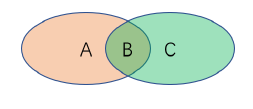
</p></div>

$H(X)$指代的是$A\cup B$，$H(Y)$指代的是$B\cup C$，$H(X|Y)$指代的是$A$，$H(Y|X)$指代的是$C$，H(Y,X)指代的是$A\cup B\cup C$，$G(Y,X)$指代的是$B$。

### 3. 三种决策树是怎么分类的？有哪些不同点？

|决策树类型|类别特征|数值特征|含缺失值的特征|优势|
|:---:|:---|:---|:---|:---|
|ID3|目标：每个节点选择最大化**信息增益**分裂|无法处理/转化为类别特征|无法处理|无|
|C4.5|目标：每个节点选择最大化**信息增益比**分类|通过最佳分割或均匀分割<br>将数值特征转化为类别特征处理|对含缺失值的特征进行信息增益比惩罚<br>缺失值占比越大惩罚越大|(1).削弱了ID3过度分裂偏好<br>(2).能够处理数值特征和缺失值特征<br>(3).给出了剪枝策略|
|CART|无法处理/转化为二分类|目标：每个节点选择最大化基于<br>**基尼系数的信息增益**分类|由用户自行决定|(1).既能分类又能回归<br>回归树输出叶节点下所有标签的均值<br>(2).改用基尼系数，简化熵的计算|

一些概念：
* C4.5-信息增益比
$$G^R(Y,X)=\frac{G(Y,X)}{H(X)}$$

* CART-回归信息增益
$$G^{\text{MSE}}(Y,X)=\text{MSE}-\Big(\frac{N_L}{N}\text{MSE}_L+\frac{N_R}{N}\text{MSE}_R\Big)$$

* CART-分类基尼系数
$$\text{Gini}(Y)=E_Y[1-p(Y)]$$

<div class="alert alert-block alert-success"><h4>练习3</h4><p>
    假设当前我们需要处理一个分类问题，请问对输入特征进行归一化会对树模型的类别输出产生影响吗？请解释原因。
</p></div>

首先，**特征归一化并不会对结果造成影响**，因为归一化属于单调的线性变换，而数值缩放并不会影响分裂点的位置。只要排序的顺序不变，那么所属的分支以及分裂点就不会产生区别。

但是，归一化的好处是可以加快梯度下降求解的速度，而**树模型是不能进行梯度下降**的，因为构建树模型寻找最优点时是通过寻找最优分裂点完成的，因此树模型是阶跃的，阶跃点是不可导的，求导也没有意义，因此**在实际运行中不需要归一化**。

<div class="alert alert-block alert-success"><h4>练习4</h4><p>
    在处理有缺失值得特征时，我们使用修正的信息增益
    
$$\tilde{G}(Y,X)=(1-\gamma)G(\tilde{Y},\tilde{X})$$
    
其中$\tilde{Y},\tilde{X}$是非缺失值的标签和特征，$\gamma$是缺失值比例。如果将系数替换为$1-\gamma^2$，请问对缺失值是加强了还是削弱了惩罚？
</p></div>

我们知道$0\leqslant\gamma\leqslant1$，因此$0\leqslant\gamma^2\leqslant\gamma\leqslant 1$，因此$G(\tilde{Y},\tilde{X})$前面的系数变大了，对缺失值的惩罚也就削弱了。

<div class="alert alert-block alert-success"><h4>练习5</h4><p>
    如果将树的生长策略从深度优先生长改为广度优先生长，假设其他参数保持不变的情况下，两个模型对应的结果输出可能不同吗？
</p></div>

不管是深度优先增长还是广度优先增长，每个节点都是达到停止条件后才停止分裂，各个叶节点之间的分裂互不干扰，其区别只是搜索顺序的区别，因此两个模型对应的结果输出是相同的。

但是，深度优先生长和最佳增益生长对应的输出是完全可能不相同的。

<div class="alert alert-block alert-success"><h4>练习6</h4><p>
    在一般的机器学习问题中，我们总是通过一组参数来定义模型的损失函数，并且在训练集上以最小化该损失函数为目标进行优化。请问对于决策树而言，模型优化的目标是什么？
</p></div>

对于决策树而言，优化目标是最大化信息增益/信息增益比/基尼系数。

<div class="alert alert-block alert-success"><h4>练习7</h4><p>
    对信息熵中的$log$函数在$p=1$处进行一阶泰勒展开可以近似为基尼系数，那么如果在$p=1$处进行二阶泰勒展开我们可以获得什么近似指标？请写出对应指标的信息增益公式。
</p></div>

对应的信息增益为
\begin{align*}
H(Y) = E_YI(p)=E_Y[-\log_2p(Y)] & \approx E_Y[1-p(Y)+\frac{1}{2}(1-p(Y))^2] \\
& = \sum_{k=1}^K\tilde{p}(y_k)(1-\tilde{p}(y_k)+\frac{1}{2}(1-\tilde{p}(y_k))^2) \\
\end{align*}

\begin{align*}
H(Y|X) = E_X[E_{Y|X}[-\log_2p(Y)]] & \approx E_X[E_{Y|X}[1-p(Y)+\frac{1}{2}(1-p(Y))^2]] \\
& = \sum_{m=1}^M\tilde{p}(x_m)\sum_{k=1}^K\tilde{p}(y_k|x_m)(1-\tilde{p}(y_k|x_m)+\frac{1}{2}(1-\tilde{p}(y_k|x_m))^2)
\end{align*}

$$G(Y,X)=H(Y)-H(Y|X)$$

<div class="alert alert-block alert-success"><h4>练习8</h4><p>
    除了信息熵和基尼系数之外，我们还可以使用节点的$1-\max_kp(Y=y_k)$和第$m$个子节点的$1-\max_kp(Y=y_k|X=x_m)$来作为衡量纯度的指标。请解释其合理性并给出相应的信息增益公式。
</p></div>

这种衡量混乱程度的指标$F(p)=1-\max_i{p_i}$满足以下的性质：

* $F(p)$对$p$是连续非负有界的，当且仅当随机变量以概率1为常数时有$F(p)=0$<br><br>
* 如果$p_1=p_2=\cdots=p_n$，那么$F(p)$关于$n$单调递增

信息增益公式为

\begin{align*}
G(Y,X) & = F(Y)-F(Y|X) \\
& = 1-\max_kp(Y=y_k)-\sum_{m=1}^Mp(X=x_m)[1-\max_kp(Y=y_k|X=x_m)] \\
& = \sum_{m=1}^Mp(X=x_m)\max_kp(Y=y_k|X=x_m)-\max_kp(Y=y_k)
\end{align*}

根据信息增益公式，我们可以推理出第三条性质：

* 信息增益$G(Y,X)\geqslant 0$，且$Y$与$X$独立时$G(Y,X)=0$

证明：不失一般性，假设$Y=y_1$时概率最大，则

\begin{align*}
\max_kp(Y=y_k) = p(Y=y_1) & = \sum_{m=1}^Mp(X=x_m)p(Y=y_1|X=x_m) \\
& \leqslant \sum_{m=1}^Mp(X=x_m)\max_kp(Y=y_k|X=x_m)
\end{align*}

不难得到$G(Y,X)\geqslant 0$，且$Y$与$X$独立时等号成立(但等号成立不能保证独立)。

### 4. 决策树的剪枝策略是怎样的？

决策树的剪枝策略主要有两种：**预剪枝**和**后剪枝**。

* 预剪枝是指树在判断节点是否分裂的时候就预先通过一些规则来阻止其分裂；

预剪枝通过确定模型的最大树深度、节点分裂的最小样本数等参数进行控制。


* 后剪枝是指在树的节点已经全部生长完成后，通过一些规则来摘除一些子树。

后剪枝定义了树的剪枝度量$T$，

$$R_\alpha(T^N)=R(T^N)+\alpha|T^N|$$

其中$R(T^N)$表示不纯度，$\alpha$是参数，$|T^N|$是叶节点数量。

其基本思想是，如果对于决策树某一个节点为根的子树，其根的剪枝度量低于该子树的剪枝度量，那么这个根节点就没有必要分裂。

<div class="alert alert-block alert-success"><h4>练习9</h4><p>
    为什么对没有重复特征值的数据，决策树能够做到损失为0？
</p></div>

在没有重复特征值数据的情况下，决策树总是可以不断分裂，使得每个叶节点只包含一个实例，使得损失为0。

<div class="alert alert-block alert-success"><h4>练习10</h4><p>
    如何理解min_samples_leaf参数能够控制回归树输出值的平滑程度？
</p></div>

因为叶节点样本数越小，回归取值相对越多，间断点越多，且各叶节点取值的均方误差越大，因此越不光滑。

### 知识回顾

<div class="alert alert-block alert-success"><h4>知识回顾1</h4><p>
    ID3树算法、C4.5树算法和CART算法之间有何异同？
</p></div>

相同点：

* 都属于决策树算法，都可以有效实现分类任务。

* 都通过最大化信息增益/信息增益比进行分裂。

不同点可见上文整理部分。

<div class="alert alert-block alert-success"><h4>知识回顾2</h4><p>
    什么是信息增益？它衡量了什么指标？它有什么缺陷？
</p></div>

信息增益是指得到了随机变量X的取值信息时，随机变量Y不确定性的平均减少量。即节点分裂之后带来了多少不确定性的降低或纯度的提高。

信息增益对类别较多的特征存在偏好，使用了信息增益比来代替信息增益更合适。

<div class="alert alert-block alert-success"><h4>知识回顾3</h4><p>
    sklearn决策树中的random_state参数控制了哪些步骤的随机性？
</p></div>

random_state参数可以控制抽出max_features个特征的随机性。

如果设置random_state为某个特定的值，那么用相同的训练集建树得到的结果就会是一模一样的，可以理解为抽取特征的随机种子。

<div class="alert alert-block alert-success"><h4>知识回顾4</h4><p>
    决策树如何处理连续变量和缺失变量？
</p></div>

对连续变量，决策树一般可以通过随机分割或最佳分割的方式，将连续变量转换成离散变量进行处理。

对缺失变量，可以利用修正的信息增益，根据缺失样本比例进行对应的惩罚。

<div class="alert alert-block alert-success"><h4>知识回顾5</h4><p>
    基尼系数是什么？为什么要在CART中引入它？
</p></div>

基尼系数的定义为$E_Y[1-p(Y)]$，起到与信息熵类似的作用，可以衡量混乱程度。

在CART中引入它的原因是利用Taylor展开简化比较复杂的对数运算。

<div class="alert alert-block alert-success"><h4>知识回顾6</h4><p>
    什么是树的预剪枝和后剪枝？具体分别是如何操作的？
</p></div>

具体可见上文整理部分